##  Vídeo 1.2 - Importando dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv', sep = ',')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [5]:
dados.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'VariasLinhasTelefonicas', 'ServicoDeInternet',
       'SegurancaOnline', 'BackupOnline', 'SeguroNoDispositivo',
       'SuporteTecnico', 'TVaCabo', 'StreamingDeFilmes', 'TipoDeContrato',
       'PagamentoOnline', 'FormaDePagamento', 'ContaMensal', 'Churn'],
      dtype='object')

## Vídeo 1.3 - Diferentes Variáveis

In [6]:
# Modificação de forma manual

traducao_dic = {'Sim':1,
                'Nao':0}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo','PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
# Transformação pelo get_dummies

# utilizando a função get_dummies
# retiramos as colunas 'Conjuge', 'Dependentes', 'TelefoneFixo','PagamentoOnline', 'Churn' porque elas ja foram modificadas

dummies_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo','PagamentoOnline', 'Churn'], axis = 1))
dummies_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [8]:
# junção dos dados transformados com os que já tinhamos 
dados_final = pd.concat([dadosmodificados, dummies_dados], axis = 1)

In [9]:
# deve ter 39 colunas pois é dadosmodificados + dummies_dados
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [10]:
dados_final.columns

Index(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn',
       'Maior65Anos', 'MesesDeContrato', 'ContaMensal',
       'VariasLinhasTelefonicas_Nao',
       'VariasLinhasTelefonicas_SemServicoTelefonico',
       'VariasLinhasTelefonicas_Sim', 'ServicoDeInternet_DSL',
       'ServicoDeInternet_FibraOptica', 'ServicoDeInternet_Nao',
       'SegurancaOnline_Nao', 'SegurancaOnline_SemServicoDeInternet',
       'SegurancaOnline_Sim', 'BackupOnline_Nao',
       'BackupOnline_SemServicoDeInternet', 'BackupOnline_Sim',
       'SeguroNoDispositivo_Nao', 'SeguroNoDispositivo_SemServicoDeInternet',
       'SeguroNoDispositivo_Sim', 'SuporteTecnico_Nao',
       'SuporteTecnico_SemServicoDeInternet', 'SuporteTecnico_Sim',
       'TVaCabo_Nao', 'TVaCabo_SemServicoDeInternet', 'TVaCabo_Sim',
       'StreamingDeFilmes_Nao', 'StreamingDeFilmes_SemServicoDeInternet',
       'StreamingDeFilmes_Sim', 'TipoDeContrato_DoisAnos',
       'TipoDeContrato_Mensalmente', 'TipoDeContrato_UmAno

## 1.4 Definição informal 

(slides)

##  1.5 Definição Formal

Informações para classificação

<b>X</b> = inputs (dados de entrada)<br>
<b>y</b> = outputs (dados de saída)

In [11]:
# Dica : para ver as colunas inteiras
pd.set_option('display.max_columns', 39)

In [12]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


y_i = f(x_i)

In [13]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color = red;'>A maquina vai aprender atráves dos outros dados apresentados dos outros clientes, a partir do X da maria.

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b>Classificação</b><br>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Quando precisamos prever a qual categoria pertence uma determinada amostra, trata-se de um problema de classificação. Alguns exemplos que podemos citar são:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prever se um(a) determinado(a) paciente está com Covid.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Se um(a) cliente está propenso(a) a desistir da compra.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Se algum(a) usuário(a) web está propenso(a) a clicar em um anúncio.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nesses casos mencionados, a previsão se concentra em 0 ou 1 (Covid/não Covid, desistir/não desistir, clicar/não clicar) que é denominada de classificação binária, na qual existem somente duas classes. Há também casos em que a classificação se dá com mais duas classes, chamada de classificação multiclasse, como a filtragem dos e-mails em “principal”, “social”, “promoções”, “importantes” ou “fóruns”.

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Entre os algoritmos de classificação podemos citar:

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> K-Nearest Neighbors (KNN) </li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Support Vector Machine (SVM)</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Decision Tree Classifier</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Random Forest Classifier</li>
    
    
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b>Regressão</b>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Quando precisamos prever um valor numérico <p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>específico, isso indica que estamos lidando com um problema de regressão. Alguns exemplos desses problemas estão relacionados à previsão de:

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>preços/custos futuros; </li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>estoque; </li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>receita futura. </li>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nessas situações, podemos utilizar algum modelo de regressão para realizar essas previsões e apresentar como resposta algum valor contínuo relacionado ao problema. Existem diferentes tipos de algoritmos de machine learning utilizados para resolver esse tipo de problema:

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Linear Regression;</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Random Forest Regressor;</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Support Vector Regression (SVR).</li>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Caso queira aprofundar e conhecer mais sobre algoritmos de regressão, deixamos aqui a indicação de dois cursos que abordam esse assunto:

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Regressão Linear: Testando Relações e Prevendo Resultados;</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Regressão Linear: Técnicas Avançadas de Modelagem.</li>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>K-Nearest Neighbors (KNN)</b> </p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Algoritmo de machine learning supervisionado. Pode ser usado para feramentas de classificação e regressão.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>    O k-nearest neighbors (KNN) é um algoritmo de machine learning que pode ser utilizado para classificação. Para se chegar à previsão final, o KNN segue alguns passos em uma ordem específica.
    <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Recebe as informações </li>
    <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Calcular as distâncias </li>
    <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Ordenar da menor distância para a maior </li>
    <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Classificar a particar de k-vizinhos </li>
    <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Definir o churn.</li>
        
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> K muito pequeno  pode causar <b>overfitting</b>, e um K muito grande pode causar <b>Underfitting</b>, pois o número de classes será muito alto para ele conseguir identificar a classe correta de cada variável, de cada cliente. O <b>K</b> é muito importante para a classificação.</p>

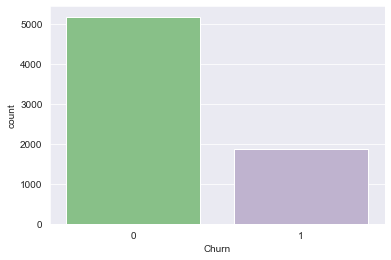

In [14]:
import seaborn as sns
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

##  2.1 Modelo k-nearest neighbors(KNN)

(slides)

## 2.2 KNN por trás dos panos

In [15]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [16]:
#ymaria = ?

In [17]:
# Divisão de inputs e outputs

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Importar a biblioteca para padronizar os dados.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É importante padronizar os dados e deixá-los na mesma escala pois estamos fazendo uma métrica de distância.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

# Os dados de todos os clientes foram normalizados

array([[ 1.03453023, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 , -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [20]:
X_normalizado[0]

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.16032292, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

In [21]:
# Normalizando os dados da maria
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.32743831, -0.85417615,
        -0.72373975,  1.12910177, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
         1.90140322, -0.72396752, -0.98632101,  1.90140322, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171, -0.80874158, -0.52592737,
         1.25617071, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

## Distância Euclidiana
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'> É a hipotenusa, uma distância menor comparado a distância Manhattan
<a href= "https://www.delftstack.com/pt/howto/numpy/calculate-euclidean-distance/" > Link para a Fórmula</a>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A medida de distância mais conhecida e mais utilizada é a distância euclidiana. Ela consiste em subtrair as coordenadas de uma observação pela outra observação, elevar ao quadrado os resultados, somar todos os valores e extrair a raiz quadrada.</p>
    
## Distância Manhattan
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'> Distâncias apenas horizontais e verticais.
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Uma distância que considera apenas a soma dos módulos das diferenças entre cada par de coordenadas.</p>


## Distância de Minkowski
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Uma medida de distância que é a generalização de outras distâncias, como a distância euclidiana e a de Manhattan. Consiste em extrair o módulo da diferença entre cada par de coordenadas elevando o resultado a m, realizar a soma de todos os termos e, por fim, tirar a raiz m-ésima, em que m é um número qualquer. A distância euclidiana é um caso à parte quando m é igual a 2 e a distância de Manhattan é um caso à parte quando m é igual a 1.</p>
    
    
## Distância de Chebyshev
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É uma medida de distância que considera apenas o valor máximo entre os módulos das diferenças entre as variáveis. Dessa forma, leva em consideração apenas a variável que possui a maior diferença de valores entre as duas observações.</p><br><br>
    
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Podemos modificar a medida de distância utilizando o argumento metric da função sklearn.neighbors.KNeighborsClassifier. Com base nas medidas que foram apresentadas no texto, o parâmetro pode receber os seguintes valores:

  <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>“euclidean” para a distância euclidiana;</li>
  <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>“manhattan” para a distância de Manhattan;</li>
  <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>“minkowski” para a distância de Minkowski;</li>
  <li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>“chebyshev” para a distância de Chebyshev.</li>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Caso tenha interesse em descobrir o funcionamento ou outras medidas de distância que podem ser utilizadas, confira a documentação do <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric">sklearn.metrics.DistanceMetric.</a>

In [22]:
import numpy as np

In [23]:
# A variável "a" será o conjunto normalizado de informações de maria
a = Xmaria_normalizado

In [24]:
# A variável "b" será o conjunto normalizado de informações do cliente 0
b = X_normalizado[0]

In [25]:
# Começando pela subtração
a - b

array([[-2.00115254,  0.        ,  3.3814487 ,  0.        ,  0.        ,
        -0.04072036,  0.3340212 ,  2.00139589, -3.3814487 ,  0.        ,
        -2.10545189,  2.01476153,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.42733059,  0.        , -2.00018971,  2.42733059,  0.        ,
         0.        ,  0.        ,  0.        , -2.0452305 ,  0.        ,
         2.05224086,  0.        , -2.01015362,  2.45883121,  0.        ,
        -2.11744436,  0.        ,  2.41708643]])

In [26]:
# Elevar ao quadrado
np.square(a-b)

array([[4.00461149e+00, 0.00000000e+00, 1.14341953e+01, 0.00000000e+00,
        0.00000000e+00, 1.65814802e-03, 1.11570160e-01, 4.00558550e+00,
        1.14341953e+01, 0.00000000e+00, 4.43292768e+00, 4.05926401e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.89193381e+00, 0.00000000e+00, 4.00075888e+00, 5.89193381e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.18296779e+00, 0.00000000e+00, 4.21169253e+00, 0.00000000e+00,
        4.04071758e+00, 6.04585093e+00, 0.00000000e+00, 4.48357062e+00,
        0.00000000e+00, 5.84230682e+00]])

In [27]:
# Somatório
np.sum(np.square(a-b))

84.07574038273466

In [28]:
# Extraindo a raiz para obter a distância
np.sqrt(np.sum(np.square(a-b)))

# Esta é a distância da maria com o cliente 0 da nossa base.
# Agora precisa ser feito o mesmo para todos os clientes da nossa base.


9.169282435541762

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>No <b>algoritmo KNN</b>, para que seja feita a classificação dos registros com base nos vizinhos mais próximos, é necessário utilizar alguma medida para identificar o quão próximo o registro está dos seus vizinhos. Existem diversas medidas para se avaliar essa proximidade entre variáveis numéricas que recebem o nome de medidas de distância. Quanto maior o valor dessa medida, mais distante um elemento está do outro, ou seja, menor a similaridade entre eles.

## 2.3 Implementando o modelo 

In [29]:
# Biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

##  Treino e teste

In [31]:
# Biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos ( k = 5)
knn = KNeighborsClassifier(metric = 'euclidean')

In [33]:
# Treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [34]:
# Testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)

In [35]:
predito_knn

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b> Naïve Bayes </b>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>O classificador multinomial Naïve Bayes é um dos modelos mais populares no aprendizado de máquina. Tomando como premissa a suposição de independência entre as variáveis do problema, o modelo de Naïve Bayes realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas.    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Sendo um modelo adequado para classificação de atributos discretos, <b>o Naïve Bayes tem aplicações na análise de crédito, diagnósticos médicos ou busca por falhas em sistemas mecânicos.</b>

    
   
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>É uma fórmula utilizada para calcular a probabilidade de um evento ocorrer sabendo que um outro evento, chamado de condicionante, já ocorreu, denominado probabilidade condicional. Sua notação é dada por P(A|B), que significa a probabilidade de A dado que B já aconteceu e é definido pela seguinte equação:
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>P(B|A): probabilidade de B acontecer dado que A já aconteceu;</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>P(A): probabilidade de A acontecer;</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>P(B): probabilidade de B acontecer.</li><br>
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Os modelos classificadores de Naïve Bayes realizam seus cálculos com base em probabilidades e desconsideram a correlação entre as variáveis.
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>BernoulliNB()</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>GaussianNB()</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>MultinomialNB()</li>
    
    
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Fontes :
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://www.digitalhouse.com/br/blog/naive-bayes/">DigitalHouse
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107730"> Alura </a>

## 3.3 Treinamento e teste

In [36]:
X_treino

array([[-0.96662231, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023,  1.5290241 , -3.05401039, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [37]:
y_treino

1479    0
2377    0
6613    0
6468    0
2668    1
       ..
5218    0
4060    0
1346    1
3454    0
3582    0
Name: Churn, Length: 4930, dtype: int64

In [38]:
# Escolho utilizar a mediana, porque é o valor central dos nossos dados ordenados
np.median(X_treino)

-0.5259273725834717

In [39]:
# Biblioteca para criamos o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [40]:
# Criamos o modelo
bnb = BernoulliNB(binarize= -0.5259)


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>O <b>-0.5259</b> define que acima desse valor, vai considerar as variáveis como 1 e abaixo desse valor, será 0. Tornando-se assim, uma variável binária.

In [41]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.5259)

In [42]:
predito_bnb = bnb.predict(X_teste)

In [43]:
predito_bnb

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b>Árvore de decisão ou Decision Tree</b>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Árvore de decisão é um dos modelos de previsão mais simples, inspirada na forma que os seres humanos tomam as decisões e tem uma alta interpretabilidade, ou seja, uma compreensão fácil dos passos que foram realizados para conseguir chegar ao resultado final. Ela pode ser utilizada tanto para modelos de regressão, que têm intuito de prever valores numéricos, quanto para modelos de classificação, que têm intuito de prever categorias.
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Uma árvore decisória pode ser utilizada em qualquer situação cotidiana que envolva tomada de decisão. Para definir um roteiro de viagem que passa por diferentes cidades, por exemplo, o nó inicial representaria o local de partida; e os nós das ramificações as cidades pelas quais o trajeto poderia passar; o nó final, nesse caso, representaria o destino final da viagem.

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Graficamente, a árvore de decisão pode ser representada de forma que cada uma das decisões tomadas no processo possam ser visualizadas. Seus elementos principais são os <b>nós, ramos e folhas</b>. A estrutura da árvore se inicia com um nó inicial, também chamado de raiz. A partir dela são traçadas ramificações, que geram novos nós e o processo se repete para os nós subsequentes até que chegue a uma folha, que se trata de um nó especial que tem a informação da resposta, sendo ela uma categoria ou um valor previsto.

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Cada ramo representa uma tomada de decisão a partir de um valor ou de uma categoria das variáveis explicativas, dividindo o conjunto de dados em nós que apresentam dados com características cada vez mais similares entre si.<br>
    
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b>Índice Gini</b>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo: 
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>pi</b> representa a frequência relativa das classes em cada um dos nós;
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>k</b> é o número de classes.</li>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:red;'><b>Entropia</b>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>pi</b> representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i;
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>c</b> é o número de classes.</li>

    
 <p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Fontes :
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://ferramentasdaqualidade.org/arvores-decisorias/">Ferramentas de qualidade
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107730"> Alura </a>

##  4.3 Implementando o modelo

In [44]:
# Biblioteca para criarmos o modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
# Treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [47]:
# Verificar a importância de cada atributo
dtc.feature_importances_

array([0.03168742, 0.01862901, 0.00064085, 0.02675693, 0.0208788 ,
       0.2056003 , 0.29546501, 0.0061786 , 0.00273035, 0.00747536,
       0.        , 0.04908356, 0.        , 0.01609395, 0.        ,
       0.00722833, 0.01220706, 0.        , 0.01248286, 0.01138295,
       0.0006673 , 0.0095669 , 0.01841631, 0.        , 0.00650511,
       0.00385849, 0.        , 0.00666929, 0.00517146, 0.        ,
       0.00665371, 0.00473251, 0.15803541, 0.00348686, 0.01414378,
       0.01601964, 0.01064163, 0.01091026])

In [48]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [49]:
predito_ArvoreDecisao

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

## 5 Validação dos modelos

## 5.2 Matriz de confusão


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>A Matriz de Confusão é uma tabela onde facilmente identificamos todos os quatro tipos de classificação do modelo de classificação binário (isto é, com apenas dois valores distintos na variável resposta). Com ela, facilmente podemos calcular valores como acurácia, especificidade, sensibilidade, etc. </p>
    
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Verdadeiros Positivos (TP)</b>são observações cujo valor real é positivo e o valor previsto é positivo, isto é, o modelo acertou</li>

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Verdadeiros Negativos (TN)</b> são observações cujo valor real é negativo e o valor previsto é negativo, isto é, o modelo acertou</li>

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Falsos Positivos (FP)</b> são casos em que o resultado correto é negativo entretanto o resultado obtido é positivo, isto é, o modelo errou</li>
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Falsos Negativos (FN)</b> são casos em que o resultado correto é positivo entretanto o resultado obtido é negativo, isto é, o modelo errou</li>
    
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify; color:Red;'><b>Métricas</b>
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Acurácia, Sensibilidade e Especificidade se referem a métricas de avaliação dos modelos, queremos olhá-las para checar quão bem o modelo está fazendo as classificações. Quanto melhor o modelo, mais altos são os valores dessas métricas.

<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Acurácia:</b> é a proporção de acertos do modelo. Para calculá-la, pega-se o número total de observações que o modelo acertou e divide-se pelo número total de observações que o modelo previu.
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Sensibilidade:</b> também chamada de recall, é a proporção de casos positivos que foram identificados corretamente. Para calculá-la, toma-se o número de observações que o modelo classificou como positivos corretamente (verdadeiros positivos) e divide-se pelo número total de observações com rótulo positivo (verdadeiros positivos + falsos negativos).
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Especificidade:</b> é a proporção de casos negativos que foram identificados corretamente. Para calculá-la, toma-se o número de observações que o modelo classificou como negativos corretamente (verdadeiros negativos) e divide-se pelo número total de observações com rótulo negativo (verdadeiros negativos + falsos positivos).
    
<li style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'><b>Valor de previsão positivo/negativo:</b> em um problema de classificação binário, as observações pertencem a duas classes, que podem ter quaisquer nomes (bom ou mau, sim ou não, 0 ou 1). No momento do treinamento, essas categorias são sempre codificadas como 0 ou 1, de modo que nos referimos às observações com rótulo 0 como sendo a classe negativa, e as observações com rótulo 1 como sendo a classe positiva. Portanto, quando o modelo diz que uma observação tem valor 0 na variável-resposta, dizemos que esse é um valor de previsão negativo, e quando o modelo diz que uma observação tem valor 1 na variável-resposta, dizemos que esse é um valor de previsão positivo.</li>
    
    
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Fontes :
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://ajuda.datarisk.io/knowledge/o-que-%C3%A9-matriz-de-confus%C3%A3o">datarick
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;' href = "https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107730"> Alura </a>

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_teste, predito_knn))

[[1301  222]
 [ 317  273]]


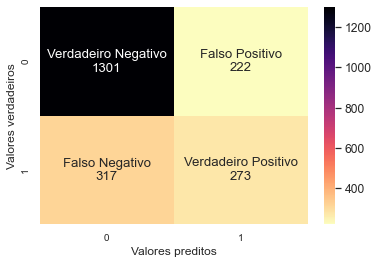

In [65]:
# Importando o método da matriz de confusão

from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_teste, predito_knn)  # Matriz de confusão
mc


# Função para gerar a matriz de confusão como está no para saber mais.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)
    
    ax = plt.subplot()
    sns.set(font_scale=1.1) 
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)
    
    label_font = {'size':'12'}  
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);
    
    ax.tick_params(axis='both', which='major', labelsize=10)  

    
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']




gerando_matriz(mc, labels, categorias, cmap="magma_r")

In [66]:
print(confusion_matrix(y_teste, predito_bnb))

[[1051  472]
 [ 116  474]]


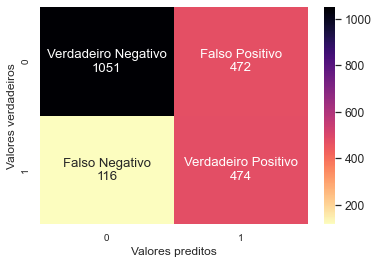

In [67]:
# Importando o método da matriz de confusão

from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_teste, predito_bnb)  # Matriz de confusão
mc


# Função para gerar a matriz de confusão como está no para saber mais.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)
    
    ax = plt.subplot()
    sns.set(font_scale=1.1) 
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)
    
    label_font = {'size':'12'}  
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);
    
    ax.tick_params(axis='both', which='major', labelsize=10)  

    
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc, labels, categorias, cmap="magma_r")

In [68]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  274]
 [ 290  300]]


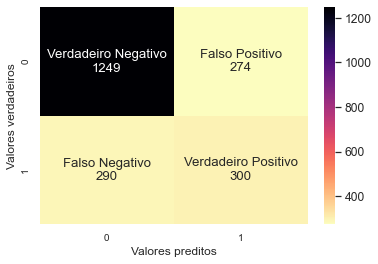

In [69]:
# Importando o método da matriz de confusão

from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_teste, predito_ArvoreDecisao)  # Matriz de confusão
mc


# Função para gerar a matriz de confusão como está no para saber mais.

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)
    
    ax = plt.subplot()
    sns.set(font_scale=1.1) 
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)
    
    label_font = {'size':'12'}  
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);
    
    ax.tick_params(axis='both', which='major', labelsize=10)  

    
categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc, labels, categorias, cmap="magma_r")

##  5.3 Precisão


In [70]:
from sklearn.metrics import precision_score

In [71]:
# Modelo KNN
print(precision_score(y_teste, predito_knn))

0.5515151515151515


In [72]:
# Modelo Bernoulli de Naive Bayes
print(precision_score(y_teste, predito_bnb))

0.5010570824524313


In [73]:
# Modelo Árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.5226480836236934


##  5.4 Recall

In [74]:
from sklearn.metrics import recall_score

In [75]:
# Modelo KNN
print(recall_score(y_teste, predito_knn))

0.46271186440677964


In [76]:
# Modelo Bernoulli de Naive Bayes
print(recall_score(y_teste, predito_bnb))

0.8033898305084746


In [77]:
# Modelo Árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.5084745762711864


## Escolhendo o melhor modelo

In [79]:
# Exemplo - Ánalise de precisões calculadas anteriormente
print('Modelo KNN:', precision_score(y_teste, predito_knn))
print('Modelo Bernouli de Naive Bayes:', precision_score(y_teste, predito_bnb))
print('Modelo Árvore de decisão:', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN: 0.5515151515151515
Modelo Bernouli de Naive Bayes: 0.5010570824524313
Modelo Árvore de decisão: 0.5226480836236934


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Comparando os modelos, o escolhido será o modelo KNN.